In [39]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/digit-recognizer/sample_submission.csv
/kaggle/input/digit-recognizer/train.csv
/kaggle/input/digit-recognizer/test.csv


load data .csv file 

In [40]:
train = pd.read_csv("/kaggle/input/digit-recognizer/train.csv")
test = pd.read_csv("/kaggle/input/digit-recognizer/test.csv")


In [41]:
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


set up the base data needed

In [42]:
train_y = train[['label']]
train_y.head()

,label
0,1
1,0
2,1
3,4
4,0


set up the dataset

In [43]:
from sklearn.model_selection import train_test_split 
x_train,x_test,y_train,y_test = train_test_split(train_x,train_y,test_size=0.2)
print(x_train.shape,y_train.shape,x_test.shape,y_test.shape)

(33600, 784) (33600, 1) (8400, 784) (8400, 1)


In [44]:
# x_train = x_train/255.0 
# x_test = x_test/255.0 
input_shape = train_x.shape[1]
print(input_shape)

784


build the simple dense model

In [45]:
import tensorflow as tf 
from tensorflow.keras.layers import Input,Dense,Dropout
from tensorflow.keras.models import Sequential


model = Sequential()
model.add(Input(input_shape))
model.add(Dense(128,activation='relu'))
model.add(Dense(128,activation='relu'))
model.add(Dense(10,activation='softmax'))
model.compile(optimizer='adam', loss="sparse_categorical_crossentropy",metrics=['accuracy'])
model.summary()


Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_15 (Dense)             (None, 128)               100480    
_________________________________________________________________
dense_16 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_17 (Dense)             (None, 10)                1290      
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________


In [46]:
history = model.fit(x_train,y_train,epochs=10,validation_data=(x_test,y_test))

Epoch 1/10
1050/1050 [==============================] - 4s 4ms/step - loss: 2.3004 - accuracy: 0.8478 - val_loss: 0.8494 - val_accuracy: 0.8818
Epoch 2/10
1050/1050 [==============================] - 4s 3ms/step - loss: 0.5521 - accuracy: 0.9107 - val_loss: 0.5560 - val_accuracy: 0.9100
Epoch 3/10
1050/1050 [==============================] - 4s 4ms/step - loss: 0.3575 - accuracy: 0.9291 - val_loss: 0.4501 - val_accuracy: 0.9080
Epoch 4/10
1050/1050 [==============================] - 4s 4ms/step - loss: 0.2899 - accuracy: 0.9383 - val_loss: 0.3511 - val_accuracy: 0.9257
Epoch 5/10
1050/1050 [==============================] - 3s 3ms/step - loss: 0.2340 - accuracy: 0.9438 - val_loss: 0.3017 - val_accuracy: 0.9371
Epoch 6/10
1050/1050 [==============================] - 4s 4ms/step - loss: 0.1828 - accuracy: 0.9537 - val_loss: 0.2678 - val_accuracy: 0.9419
Epoch 7/10
1050/1050 [==============================] - 4s 4ms/step - loss: 0.1571 - accuracy: 0.9597 - val_loss: 0.2403 - val_accuracy:

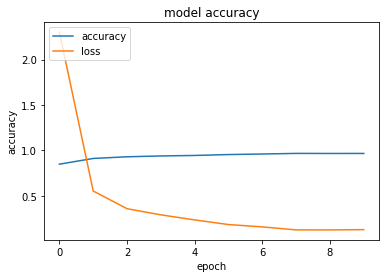

In [47]:
import matplotlib.pyplot as plt 
plt.plot(history.history['accuracy'])
plt.plot(history.history['loss'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['accuracy', 'loss'], loc='upper left')
plt.show()

set up the output .csv 

In [48]:
predictions = model.predict(test)

In [49]:
y_pred= [np.argmax(i) for i in predictions]

In [50]:
test['label'] = y_pred
test.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,label
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3


In [51]:
sub = test[['label']]
sub = sub.reset_index()
sub.columns = ['ImageId','Label']
sub['ImageId'] = sub['ImageId'] + 1
sub.head()

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,4
4,5,3


In [52]:
sub.to_csv("submission.csv", index=False)